In [1]:
import tensorflow as tf

# MNIST Dataset
## Training samples = 60,000 , Testing samples = 10,000

In [3]:
mnist = tf.keras.datasets.mnist ## this is handwritten characters based on 28x28 sized images of 0 to 9

## After loading the MNIST data,divide the datasets into train and test datasets

In [4]:
# dividing the datasets into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

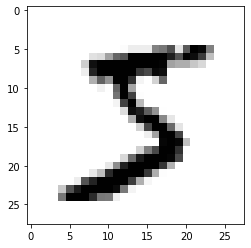

In [6]:
# first check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show #to execute the graph
plt.imshow(x_train[0] , cmap = plt.cm.binary)

## Checking the values of each pixel
# Before Normalization

In [7]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalizing the data | Pre-Processing step

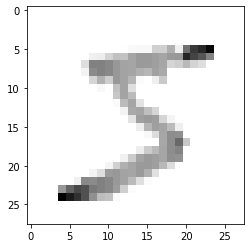

In [8]:
### as it is gray image and all values varies from 0 to 255
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

## After Normalization

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[0]) ###to check that we have labels inside the network

5


## Resizing the image to make it suitable for apply convolution operation

In [13]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ###increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ###increasing one dimension for kernel operation
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape) 

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
### Training on 60,000 samples of MNIST Dataset

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [16]:
### Creating a neural network
model = Sequential()

### First Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) ##activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling

### Second Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) ##activation function
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling

### Third Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2))) 

#Fully connected Layer #1 (20x20 = 400) 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) ## before using fully connected layer, flatten it from 2D to 1D

#Fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#Last fully connected layer, output must be equal to number of classes i.e 10 (0-9) 
model.add(Dense(10))
model.add(Activation('softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [18]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [19]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [20]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) ##Training

Epoch 1/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.3458 - accuracy: 0.8922 - val_loss: 0.1323 - val_accuracy: 0.9583
Epoch 2/5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.1115 - accuracy: 0.9660 - val_loss: 0.0940 - val_accuracy: 0.9711
Epoch 3/5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0820 - accuracy: 0.9750 - val_loss: 0.0769 - val_accuracy: 0.9761
Epoch 4/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 5/5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0721 - val_accuracy: 0.9783


In [21]:
### Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation accuracy on 10,000 test samples", test_acc) 

313/313 [==============================] - 3s 9ms/step - loss: 0.0761 - accuracy: 0.9772
Test loss on 10,000 test samples 0.07612358033657074
Validation accuracy on 10,000 test samples 0.9771999716758728


In [22]:
predictions = model.predict([x_testr])

In [23]:
print(predictions)

[[1.0780633e-06 8.8733293e-07 4.3234331e-06 ... 9.9998057e-01
  1.6921735e-08 7.3988429e-07]
 [1.1158833e-02 1.6644236e-06 9.8843122e-01 ... 5.0366060e-07
  2.1546772e-05 5.4068896e-06]
 [4.6214365e-07 9.9998462e-01 3.3621666e-07 ... 3.3837232e-06
  3.1374364e-07 2.6459679e-07]
 ...
 [2.5221928e-08 1.5361314e-07 1.2280346e-09 ... 2.8713470e-07
  3.3708002e-05 2.1081984e-05]
 [2.3402825e-04 4.2586731e-08 1.0640177e-08 ... 8.2589970e-09
  2.4321596e-03 3.8460061e-05]
 [2.3392737e-05 5.6734644e-09 9.6872981e-08 ... 4.5642858e-11
  1.0691050e-06 4.9097198e-06]]


In [24]:
print(np.argmax(predictions[0])) 

7


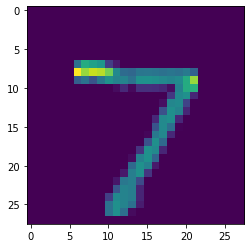

In [25]:
## to check if our answer is true or not
plt.imshow(x_test[0])

In [26]:
print(np.argmax(predictions[128]))

8


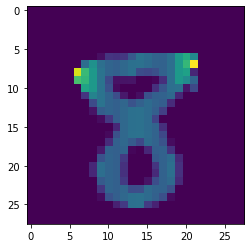

In [27]:
## to check if our answer is true or not
plt.imshow(x_test[128])

In [28]:
import cv2

In [29]:
img = cv2.imread('Eight.png')

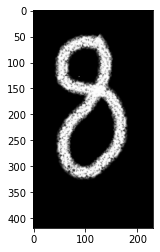

In [31]:
plt.imshow(img)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [33]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [34]:
resized.shape

(28, 28)

In [35]:
new_img = tf.keras.utils.normalize(resized, axis = 1)

In [36]:
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #kernel operation of convolution layer

In [37]:
new_img.shape

(1, 28, 28, 1)

In [38]:
predictions = model.predict(new_img)

In [39]:
print(np.argmax(predictions))

8
